In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version = 1)

In [2]:
X,y = mnist["data"],mnist["target"]
#taking only the first 1000 to save time on training

X = mnist["data"][:1000]
y = mnist["target"][:1000]

In [3]:
from sklearn.model_selection import train_test_split
Xtrain,xtest,Ytrain,ytest = train_test_split(X,y,test_size = 0.15,random_state = 42)

In [4]:
Xtrain.shape

(850, 784)

In [5]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score

In [6]:
import numpy as np

err = 0
accuracy_decreasing = 0
skf = StratifiedKFold(n_splits = 5, random_state = 42)
for i in range(1,200):
    print('Run :{}'.format(i))
    bag_clf = BaggingClassifier(DecisionTreeClassifier(), bootstrap=True, n_estimators= i, n_jobs= -1, max_samples=100)
    score = np.mean(cross_val_score(bag_clf, Xtrain,Ytrain,cv=skf, scoring = 'f1_weighted'))
    if score > err:
        accuracy_decreasing = 0
        err = score
        print(err)
    else:
        accuracy_decreasing = accuracy_decreasing + 1
        if accuracy_decreasing > 5:
            print(i - 5)
            break


Run :1
0.4291009354440609
Run :2
Run :3
0.49321390719288355
Run :4
0.5578585425870747
Run :5
0.5741205586528874
Run :6
0.6386974153564728
Run :7
0.6426539896625512
Run :8
0.6482762702364498
Run :9
0.65643445797057
Run :10
0.6946576079289093
Run :11
0.7126689963774466
Run :12
Run :13
Run :14
0.7263109866535038
Run :15
0.7292041175782724
Run :16
0.7355766044353514
Run :17
Run :18
Run :19
0.7445582645944019
Run :20
0.7495502527521221
Run :21
0.7632986688054901
Run :22
Run :23
Run :24
0.774367798962403
Run :25
Run :26
Run :27
Run :28
0.7754373696423335
Run :29
0.7960080370413135
Run :30
Run :31
Run :32
Run :33
Run :34
Run :35
30


In [7]:
import time
start_time = time.time()
bag_clf_final = BaggingClassifier(DecisionTreeClassifier(splitter='random',max_leaf_nodes = 16), bootstrap=True, n_estimators= 500, n_jobs= -1, max_samples=100)
bag_clf_final.fit(Xtrain,Ytrain)
end_time = time.time()
print(end_time - start_time)

3.197448968887329


In [8]:
ypred_train = bag_clf_final.predict(Xtrain)

In [9]:
from sklearn.metrics import confusion_matrix
confusion_matrix_train = confusion_matrix(Ytrain,ypred_train)
confusion_matrix_train

array([[ 83,   0,   0,   0,   0,   0,   1,   0,   0,   0],
       [  0, 100,   0,   0,   0,   1,   0,   2,   0,   0],
       [  2,  11,  59,   0,   3,   0,   0,   5,   2,   0],
       [  1,   1,   0,  65,   1,   2,   0,   4,   0,   2],
       [  0,   1,   0,   0,  90,   1,   2,   1,   0,   1],
       [  0,   1,   0,   1,   2,  71,   2,   1,   0,   0],
       [  1,   1,   0,   0,   3,   1,  69,   1,   0,   0],
       [  1,   2,   0,   0,   2,   0,   0,  92,   0,   1],
       [  0,   5,   1,   0,   0,   3,   0,   0,  66,   1],
       [  1,   2,   0,   0,   3,   1,   1,   7,   0,  66]], dtype=int64)

In [10]:
for i in range(0,10):
    precision = confusion_matrix_train[i,i]/np.sum(confusion_matrix_train[:,i])
    recall = confusion_matrix_train[i,i]/np.sum(confusion_matrix_train[i,:])
    print('{},Precision:{},Recall:{}'.format(i,precision,recall))

0,Precision:0.9325842696629213,Recall:0.9880952380952381
1,Precision:0.8064516129032258,Recall:0.970873786407767
2,Precision:0.9833333333333333,Recall:0.7195121951219512
3,Precision:0.9848484848484849,Recall:0.8552631578947368
4,Precision:0.8653846153846154,Recall:0.9375
5,Precision:0.8875,Recall:0.9102564102564102
6,Precision:0.92,Recall:0.9078947368421053
7,Precision:0.8141592920353983,Recall:0.9387755102040817
8,Precision:0.9705882352941176,Recall:0.868421052631579
9,Precision:0.9295774647887324,Recall:0.8148148148148148


In [11]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytrain, ypred_train)

0.8952941176470588

<h3> Use PCA to reduce the dimensions </h3>

In [12]:
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.decomposition import KernelPCA

In [13]:
lin_pca = PCA()
X_reduced = lin_pca.fit_transform(Xtrain)

In [14]:
variance_percent = ((lin_pca.explained_variance_)/np.sum(lin_pca.explained_variance_))*100

In [15]:
import pandas as pd
cumulative_variance_percent = np.cumsum(variance_percent)
variance_df_1 = pd.DataFrame(data = cumulative_variance_percent, columns = ["Variance"],index = list(range(1,cumulative_variance_percent.shape[0] + 1)))

Text(125, 97.54978733625971, '95% Variance')

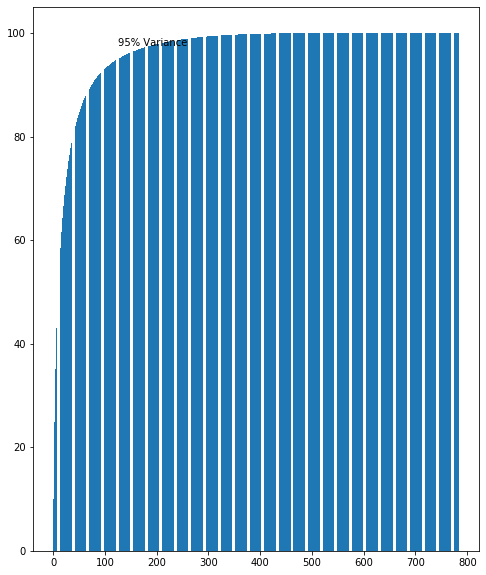

In [16]:
import matplotlib.pyplot as plt
fig,ax1 = plt.subplots(1,1,figsize = (8,10))
ax1.bar(np.array(list(range(1,cumulative_variance_percent.shape[0] + 1))),cumulative_variance_percent)
ind_95 = np.where(cumulative_variance_percent>=95)[0][0]
ax1.annotate('95% Variance', (ind_95,cumulative_variance_percent[ind_95]),(ind_95,cumulative_variance_percent[ind_95] + 2.5))
#ax1.text(ind_95,cumulative_variance_percent[ind_95], )

In [17]:
lin_pca_95 = PCA(n_components=125)
X_reduced_95 = lin_pca_95.fit_transform(Xtrain)

In [18]:
import time
start_time = time.time()
bag_clf_final_pca = BaggingClassifier(DecisionTreeClassifier(splitter='random',max_leaf_nodes = 16), bootstrap=True, n_estimators= 500, n_jobs= -1, max_samples=100)
bag_clf_final_pca.fit(X_reduced_95,Ytrain)
end_time = time.time()
print(end_time - start_time)

0.5006625652313232


In [19]:
ypred_train_pca = bag_clf_final_pca.predict(X_reduced_95)
from sklearn.metrics import confusion_matrix
confusion_matrix_train_pca = confusion_matrix(Ytrain,ypred_train_pca)
confusion_matrix_train_pca

array([[ 82,   0,   1,   0,   0,   0,   1,   0,   0,   0],
       [  0, 100,   0,   0,   1,   1,   0,   0,   1,   0],
       [  3,   8,  61,   0,   1,   0,   3,   4,   2,   0],
       [  1,   1,   0,  65,   2,   0,   1,   1,   2,   3],
       [  0,   2,   0,   0,  89,   0,   3,   0,   1,   1],
       [  6,   3,   1,   0,   5,  58,   3,   0,   0,   2],
       [  1,   0,   0,   0,   3,   1,  71,   0,   0,   0],
       [  0,   7,   1,   0,   5,   0,   0,  84,   0,   1],
       [  1,   4,   2,   1,   0,   0,   0,   0,  66,   2],
       [  0,   2,   1,   0,   8,   1,   0,   4,   1,  64]], dtype=int64)

In [20]:
for i in range(0,10):
    precision = confusion_matrix_train_pca[i,i]/np.sum(confusion_matrix_train_pca[:,i])
    recall = confusion_matrix_train_pca[i,i]/np.sum(confusion_matrix_train_pca[i,:])
    print('{},Precision:{},Recall:{}'.format(i,precision,recall))

0,Precision:0.8723404255319149,Recall:0.9761904761904762
1,Precision:0.7874015748031497,Recall:0.970873786407767
2,Precision:0.9104477611940298,Recall:0.7439024390243902
3,Precision:0.9848484848484849,Recall:0.8552631578947368
4,Precision:0.7807017543859649,Recall:0.9270833333333334
5,Precision:0.9508196721311475,Recall:0.7435897435897436
6,Precision:0.8658536585365854,Recall:0.9342105263157895
7,Precision:0.9032258064516129,Recall:0.8571428571428571
8,Precision:0.9041095890410958,Recall:0.868421052631579
9,Precision:0.8767123287671232,Recall:0.7901234567901234


In [21]:
from sklearn.metrics import accuracy_score
accuracy_score(Ytrain, ypred_train_pca)

0.8705882352941177

In [22]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42)
X_reduced = tsne.fit_transform(mnist["data"][:5000])

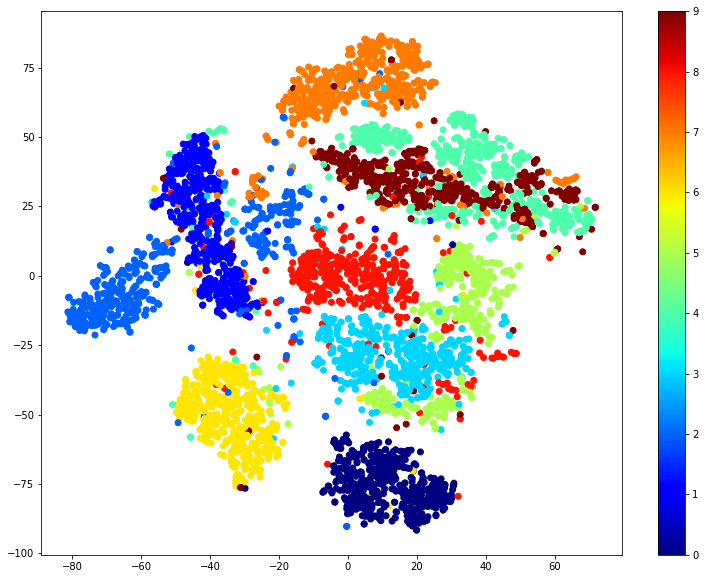

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize = (13,10))
plt.scatter(X_reduced[:,0],X_reduced[:,1],c=mnist["target"][:5000].astype(int),cmap = 'jet')
plt.colorbar()
plt.show()

TypeError: only size-1 arrays can be converted to Python scalars

In [24]:
X.shape

(1000, 784)